In [1]:
# Jupyter dirty hack
import os
import sys

PATH = "/home/emaballarin/repositories/celeba_sweeping_cvae/src/"
os.chdir(PATH)
sys.path.append(PATH)

In [2]:
from typing import Tuple
import torch as th
from models import CelebACVAE
from safetensors.torch import load_model
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [3]:
DEVICE_AUTODETECT: bool = True
IMG_SHAPE: Tuple[int, int, int] = (3, 64, 64)
TEST_BS: int = 32
LATENT_SIZE: int = 128
CONDITION_SIZE: int = 40

In [4]:
device = th.device("cuda" if (th.cuda.is_available() and DEVICE_AUTODETECT) else "cpu")

In [5]:
model = CelebACVAE(lat_size=LATENT_SIZE, cond_size=CONDITION_SIZE).to(device)

In [6]:
_ = load_model(model, "./celeba_cvae_v3.safetensors")

In [7]:
_ = model.to(device)
_ = model.eval()

In [17]:
# condition = th.round(2 * th.rand(TEST_BS, CONDITION_SIZE).to(device) - 1)
condition = th.zeros(TEST_BS, CONDITION_SIZE).to(device)
# condition[:, 4] = 1

In [18]:
with th.no_grad():
    img = model.sample_eval(z=None, c=condition.to(device))

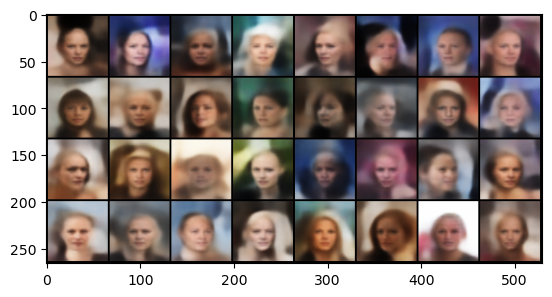

In [19]:
plt.imshow(make_grid(img).permute(1, 2, 0).cpu().detach().numpy())